In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from glob import glob 
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

In [11]:
Tomato_Bacterial_spot_images = glob("dataset/Tomato/Tomato___Bacterial_spot/*.jpg")
Tomato_Early_blight_images = glob("dataset/Tomato/Tomato___Early_blight/*.jpg")
Tomato_healthy_images = glob("dataset/Tomato/Tomato___healthy/*.jpg")
Tomato_Late_blight_images = glob("dataset/Tomato/Tomato___Late_blight/*.jpg")
Tomato_Leaf_Mold_images = glob("dataset/Tomato/Tomato___Leaf_Mold/*.jpg")
Tomato_Septoria_leaf_spot_images = glob("dataset/Tomato/Tomato___Septoria_leaf_spot/*.jpg")
Tomato_Spider_mites_Two_spotted_spider_mite_images = glob("dataset/Tomato/Tomato___Spider_mites_Two_spotted_spider_mite/*.jpg")
Tomato_Target_Spot_images = glob("dataset/Tomato/Tomato___Target_Spot/*.jpg")
Tomato_Tomato_mosaic_virus_images = glob("dataset/Tomato/Tomato___Tomato_mosaic_virus/*.jpg")
Tomato_Tomato_Yellow_Leaf_Curl_Virus_images = glob("dataset/Tomato/Tomato___Tomato_Yellow_Leaf_Curl_Virus/*.jpg")

In [12]:
print(f"Number of Tomato_Bacterial_spot_images: {len(Tomato_Bacterial_spot_images)}")
print(f"Number of Tomato_Early_blight_images: {len(Tomato_Early_blight_images)}")
print(f"Number of Tomato_healthy_images: {len(Tomato_healthy_images)}")
print(f"Number of Tomato_Late_blight_images: {len(Tomato_Late_blight_images)}")
print(f"Number of Tomato_Leaf_Mold_images: {len(Tomato_Leaf_Mold_images)}")
print(f"Number of Tomato_Septoria_leaf_spot_images: {len(Tomato_Septoria_leaf_spot_images)}")
print(f"Number of Tomato_Spider_mites_Two_spotted_spider_mite_images: {len(Tomato_Spider_mites_Two_spotted_spider_mite_images)}")
print(f"Number of Tomato_Target_Spot_images: {len(Tomato_Target_Spot_images)}")
print(f"Number of Tomato_Tomato_mosaic_virus_images: {len(Tomato_Tomato_mosaic_virus_images)}")
print(f"Number of Tomato_Tomato_Yellow_Leaf_Curl_Virus_images: {len(Tomato_Tomato_Yellow_Leaf_Curl_Virus_images)}")

Number of Tomato_Bacterial_spot_images: 2127
Number of Tomato_Early_blight_images: 1000
Number of Tomato_healthy_images: 1591
Number of Tomato_Late_blight_images: 1908
Number of Tomato_Leaf_Mold_images: 952
Number of Tomato_Septoria_leaf_spot_images: 1771
Number of Tomato_Spider_mites_Two_spotted_spider_mite_images: 1676
Number of Tomato_Target_Spot_images: 1404
Number of Tomato_Tomato_mosaic_virus_images: 373
Number of Tomato_Tomato_Yellow_Leaf_Curl_Virus_images: 2287


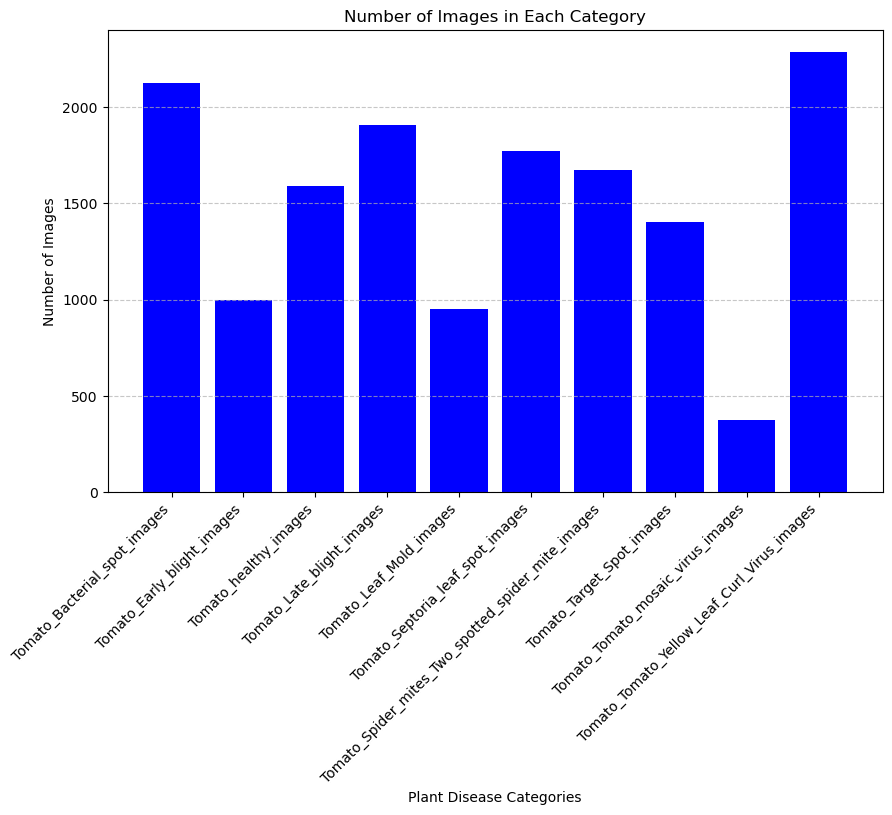

In [13]:


labels = ["Tomato_Bacterial_spot_images",
          "Tomato_Early_blight_images",
          "Tomato_healthy_images",
          "Tomato_Late_blight_images",
          "Tomato_Leaf_Mold_images",
          "Tomato_Septoria_leaf_spot_images",
          "Tomato_Spider_mites_Two_spotted_spider_mite_images",
          "Tomato_Target_Spot_images",
          "Tomato_Tomato_mosaic_virus_images",
          "Tomato_Tomato_Yellow_Leaf_Curl_Virus_images"]
counts = [len(Tomato_Bacterial_spot_images),
          len(Tomato_Early_blight_images),
          len(Tomato_healthy_images),
          len(Tomato_Late_blight_images),
          len(Tomato_Leaf_Mold_images),
          len(Tomato_Septoria_leaf_spot_images),
          len(Tomato_Spider_mites_Two_spotted_spider_mite_images),
          len(Tomato_Target_Spot_images),
          len(Tomato_Tomato_mosaic_virus_images),
          len(Tomato_Tomato_Yellow_Leaf_Curl_Virus_images)]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='blue')

# Add labels and title
plt.xlabel("Plant Disease Categories")
plt.ylabel("Number of Images")
plt.title("Number of Images in Each Category")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [14]:


IMG_SIZE = (128, 128)

def load_images(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted for consistency
    label_map = {name: idx for idx, name in enumerate(class_names)}  # Label encoding

    for label in class_names:
        class_folder = os.path.join(folder, label)
        if os.path.isdir(class_folder):
            for file in glob(os.path.join(class_folder, "*.jpg")):  # Load only images
                img = cv2.imread(file)
                if img is None:
                    continue  # Skip unreadable images

                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = cv2.resize(img, IMG_SIZE)  # Resize image
                img = img / 255.0  # Normalize pixels (0-1)
                
                images.append(img)
                labels.append(label_map[label])  # Store numerical label
    
    return np.array(images), np.array(labels), label_map  # Return label map for decoding



In [16]:
X, y, z = load_images('dataset/Tomato')
print(f"Loaded {len(X)} images with {len(set(y))} classes.")

Loaded 15089 images with 10 classes.


In [17]:
print(z)

{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites_Two_spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


In [18]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Helps prevent overfitting
    Dense(10, activation='softmax')  # 3 Output Neurons
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Normalize & split

train_generator = datagen.flow_from_directory(
    'dataset/Tomato',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'dataset/Tomato',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# **Compute class weights from the directory**
class_counts = train_generator.class_indices  # Get class labels
class_samples = train_generator.samples  # Total training images

# Get label distribution
labels = list(class_counts.values())  # Numeric labels
class_weight_values = compute_class_weight(
    class_weight="balanced",
    classes=np.array(labels),
    y=np.repeat(labels, [class_samples])  # Fake labels for weight calculation
)

class_weights = {i: weight for i, weight in zip(labels, class_weight_values)}
print("Computed Class Weights:", class_weights)

# Train model using generator
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping],
     class_weight=class_weights
)


Found 12076 images belonging to 10 classes.
Found 3014 images belonging to 10 classes.
Computed Class Weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}
Epoch 1/10
378/378 [==============================] - 157s 411ms/step - loss: 1.3808 - accuracy: 0.5112 - val_loss: 0.7117 - val_accuracy: 0.7548
Epoch 2/10
378/378 [==============================] - 150s 395ms/step - loss: 0.8312 - accuracy: 0.7194 - val_loss: 0.5965 - val_accuracy: 0.7890
Epoch 3/10
378/378 [==============================] - 161s 426ms/step - loss: 0.6584 - accuracy: 0.7764 - val_loss: 0.4742 - val_accuracy: 0.8354
Epoch 4/10
378/378 [==============================] - 146s 385ms/step - loss: 0.5657 - accuracy: 0.8043 - val_loss: 0.4102 - val_accuracy: 0.8550
Epoch 5/10
378/378 [==============================] - 146s 386ms/step - loss: 0.4745 - accuracy: 0.8408 - val_loss: 0.3306 - val_accuracy: 0.8832
Epoch 6/10
378/378 [==============================] - 152s 401ms/step - loss: 

In [20]:
train_generator.num_classes

10

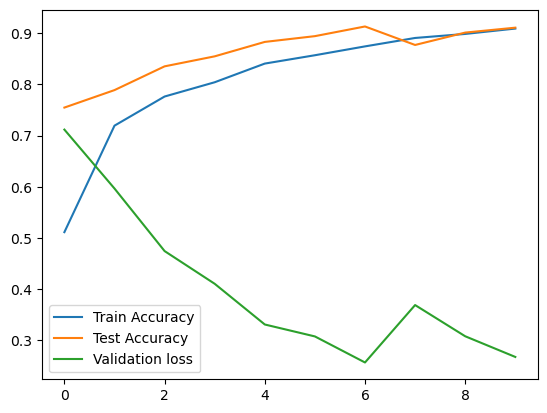

In [21]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


In [22]:
model.save("Tomato_Disease.h5")